In [1]:
import numpy as np

def print_results(results):
    for method, values in results.items():
        values = np.array(values)
        print(f"\nCalibration: {method}")
        print(f"  per fold: {np.round(values, 2)}")
        print(f"  mean LL : {values.mean():.4f}")
        print(f"  std LL  : {values.std():.4f}")

In [26]:
from collections import defaultdict
import numpy as np

def coeffs_mean(coeffs_list):
    coeffs = defaultdict(lambda: defaultdict(dict))
    n_folds = len(coeffs_list)

    target_degs = coeffs_list[0].keys()
    feature_degs = coeffs_list[0][1].keys()
    features = coeffs_list[0][1][1].keys()

    for target_deg in target_degs:
        for feature_deg in feature_degs:
            for feature in features:
                values = np.array([
                    coeffs_list[fold][target_deg][feature_deg][feature]
                    for fold in range(n_folds)
                ])
                coeffs[target_deg][feature_deg][feature] = values.mean()

    return coeffs

### 10-fold CV: HL (heating load) as target

In [3]:
from ucimlrepo import fetch_ucirepo

energy_efficiency = fetch_ucirepo(id=242) 
  
X = energy_efficiency.data.features 
y = energy_efficiency.data.targets

var_df = energy_efficiency.variables
col_map = dict(zip(var_df["name"], var_df["description"]))
X = X.rename(columns=col_map)
y = y.rename(columns=col_map)

y = y[["Heating Load"]]
df = X.join(y)
df.head()

,Relative Compactness,Surface Area,Wall Area,Roof Area,Overall Height,Orientation,Glazing Area,Glazing Area Distribution,Heating Load
0,0.98,514.5,294.0,110.25,7.0,2,0.0,0,15.55
1,0.98,514.5,294.0,110.25,7.0,3,0.0,0,15.55
2,0.98,514.5,294.0,110.25,7.0,4,0.0,0,15.55
3,0.98,514.5,294.0,110.25,7.0,5,0.0,0,15.55
4,0.90,563.5,318.5,122.50,7.0,2,0.0,0,20.84


In [4]:
from src.cv import cross_validate
HL_results, HL_coeffs_list = cross_validate(X, y)

Fold 1
  softplus: 0.7128
  clip: 0.9366
Fold 2
  softplus: 0.6903
  clip: 0.8870
Fold 3
  softplus: 0.7379
  clip: 0.9782
Fold 4
  softplus: 0.7147
  clip: 0.9222
Fold 5
  softplus: 0.7641
  clip: 0.8306
Fold 6
  softplus: 0.7560
  clip: 0.9906
Fold 7
  softplus: 0.6611
  clip: 0.8761
Fold 8
  softplus: 0.7017
  clip: 0.9250
Fold 9
  softplus: 0.7136
  clip: 0.9287
Fold 10
  softplus: 0.6483
  clip: 0.7100


In [5]:
print_results(HL_results)


Calibration: softplus
  per fold: [0.71 0.69 0.74 0.71 0.76 0.76 0.66 0.7  0.71 0.65]
  mean LL : 0.7100
  std LL  : 0.0354

Calibration: clip
  per fold: [0.94 0.89 0.98 0.92 0.83 0.99 0.88 0.93 0.93 0.71]
  mean LL : 0.8985
  std LL  : 0.0770


### HL model weights

In [ ]:
HL_coeffs = coeffs_mean(HL_coeffs_list)

In [29]:
from src.weights import print_coeffs

target_deg = 1
print(f"Mean coefficients for modeling deg={target_deg} target:\n")
print_coeffs(coefs=HL_coeffs[target_deg])

Mean coefficients for modeling deg=1 target:

Degree 1:
  Roof Area: 0.7569
  Wall Area: 0.5370
  Glazing Area: 0.3009
  Relative Compactness: 0.2705
  Surface Area: -0.2303
  Glazing Area Distribution: 0.0276
  Orientation: -0.0090
  Overall Height: 0.0000

Degree 2:
  Roof Area: -1.0941
  Wall Area: 0.4838
  Relative Compactness: 0.1953
  Glazing Area Distribution: -0.0382
  Orientation: -0.0016
  Glazing Area: -0.0003
  Surface Area: 0.0000
  Overall Height: 0.0000

Degree 3:
  Relative Compactness: 0.7187
  Wall Area: 0.0927
  Glazing Area Distribution: 0.0400
  Roof Area: 0.0305
  Overall Height: -0.0262
  Glazing Area: 0.0067
  Orientation: 0.0004
  Surface Area: 0.0000

Degree 4:
  Relative Compactness: 0.1523
  Wall Area: -0.0643
  Surface Area: -0.0633
  Glazing Area Distribution: -0.0268
  Overall Height: -0.0120
  Orientation: 0.0065
  Roof Area: 0.0031
  Glazing Area: 0.0000



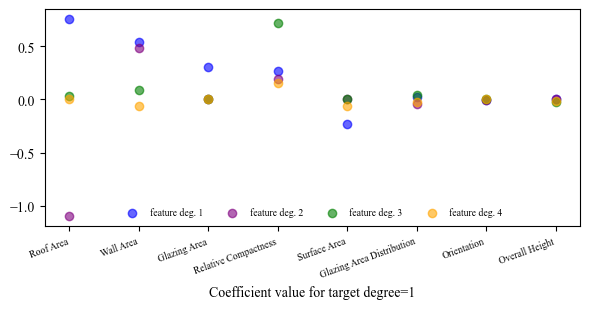

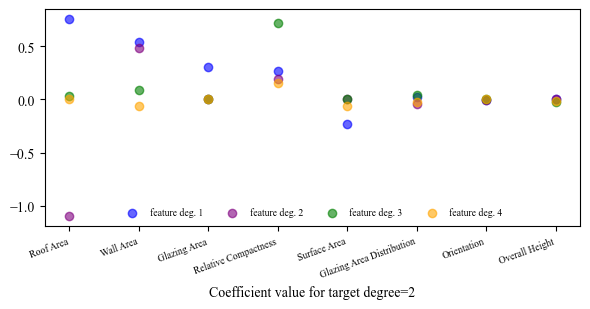

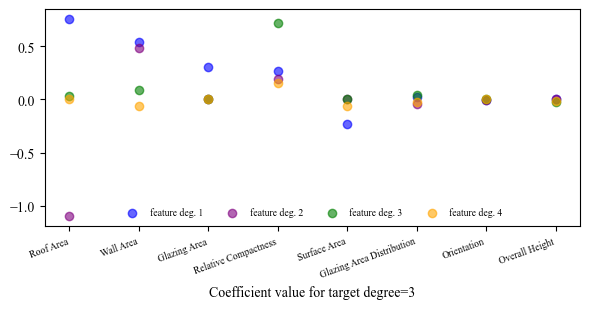

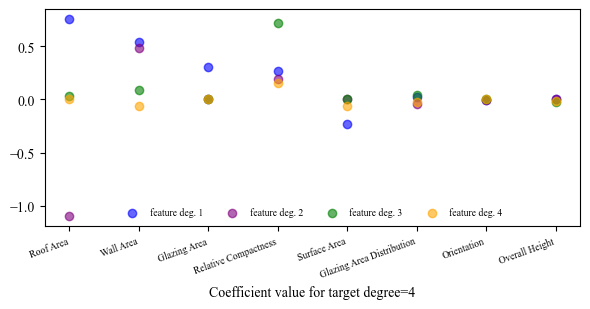

In [32]:
from src.weights import plot_coeffs

colors = ["blue", "purple", "green", "orange"]
N = 4
for deg in range(1, N+1):
    plot_coeffs(coefs=HL_coeffs[target_deg], target_deg=deg, colors=colors)

### 10-fold CV: CL (cooling load) as target

In [6]:
from ucimlrepo import fetch_ucirepo

energy_efficiency = fetch_ucirepo(id=242) 
  
X = energy_efficiency.data.features 
y = energy_efficiency.data.targets

var_df = energy_efficiency.variables
col_map = dict(zip(var_df["name"], var_df["description"]))
X = X.rename(columns=col_map)
y = y.rename(columns=col_map)

y = y[["Cooling Load"]]
df = X.join(y)
df.head()

,Relative Compactness,Surface Area,Wall Area,Roof Area,Overall Height,Orientation,Glazing Area,Glazing Area Distribution,Cooling Load
0,0.98,514.5,294.0,110.25,7.0,2,0.0,0,21.33
1,0.98,514.5,294.0,110.25,7.0,3,0.0,0,21.33
2,0.98,514.5,294.0,110.25,7.0,4,0.0,0,21.33
3,0.98,514.5,294.0,110.25,7.0,5,0.0,0,21.33
4,0.90,563.5,318.5,122.50,7.0,2,0.0,0,28.28


In [7]:
from src.cv import cross_validate
CL_results, CL_coeffs_list = cross_validate(X, y)

Fold 1
  softplus: 0.7337
  clip: 0.9667
Fold 2
  softplus: 0.7344
  clip: 0.9631
Fold 3
  softplus: 0.6511
  clip: 0.8762
Fold 4
  softplus: 0.7426
  clip: 0.9779
Fold 5
  softplus: 0.7457
  clip: 0.8055
Fold 6
  softplus: 0.6945
  clip: 0.9239
Fold 7
  softplus: 0.6592
  clip: 0.8790
Fold 8
  softplus: 0.6852
  clip: 0.9097
Fold 9
  softplus: 0.7111
  clip: 0.9293
Fold 10
  softplus: 0.6356
  clip: 0.8420


In [8]:
print_results(CL_results)


Calibration: softplus
  per fold: [0.73 0.73 0.65 0.74 0.75 0.69 0.66 0.69 0.71 0.64]
  mean LL : 0.6993
  std LL  : 0.0385

Calibration: clip
  per fold: [0.97 0.96 0.88 0.98 0.81 0.92 0.88 0.91 0.93 0.84]
  mean LL : 0.9074
  std LL  : 0.0537


### CL model weights

In [33]:
CL_coeffs = coeffs_mean(CL_coeffs_list)

In [34]:
from src.weights import print_coeffs

target_deg = 1
print(f"Mean coefficients for modeling deg={target_deg} target:\n")
print_coeffs(coefs=CL_coeffs[target_deg])

Mean coefficients for modeling deg=1 target:

Degree 1:
  Roof Area: 0.6543
  Wall Area: 0.5673
  Relative Compactness: 0.3560
  Surface Area: -0.2967
  Glazing Area: 0.2831
  Glazing Area Distribution: -0.0017
  Orientation: 0.0014
  Overall Height: 0.0000

Degree 2:
  Roof Area: -0.9836
  Wall Area: 0.5401
  Relative Compactness: 0.0935
  Orientation: 0.0178
  Surface Area: 0.0088
  Glazing Area Distribution: -0.0066
  Glazing Area: 0.0045
  Overall Height: 0.0000

Degree 3:
  Relative Compactness: 0.7167
  Wall Area: 0.1063
  Glazing Area Distribution: 0.0202
  Glazing Area: -0.0028
  Surface Area: -0.0014
  Roof Area: 0.0005
  Orientation: 0.0003
  Overall Height: 0.0000

Degree 4:
  Surface Area: -0.1471
  Wall Area: -0.0910
  Relative Compactness: 0.0823
  Roof Area: 0.0628
  Overall Height: -0.0601
  Glazing Area Distribution: -0.0237
  Orientation: -0.0013
  Glazing Area: 0.0000



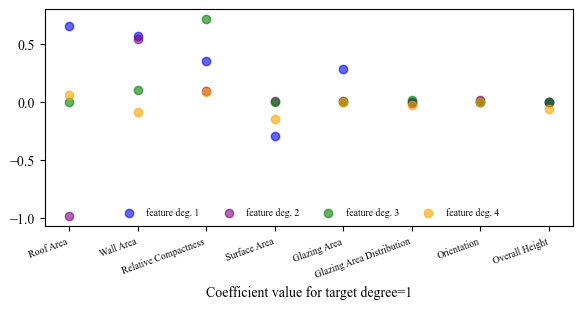

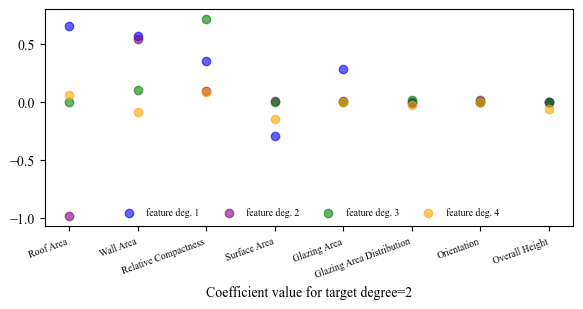

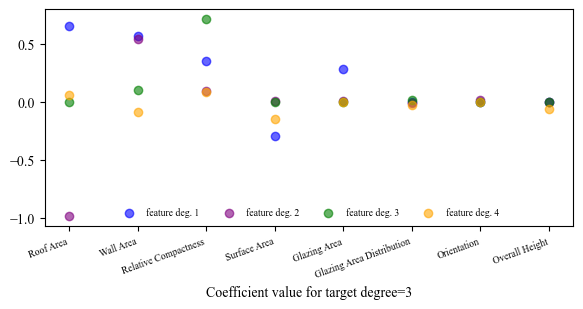

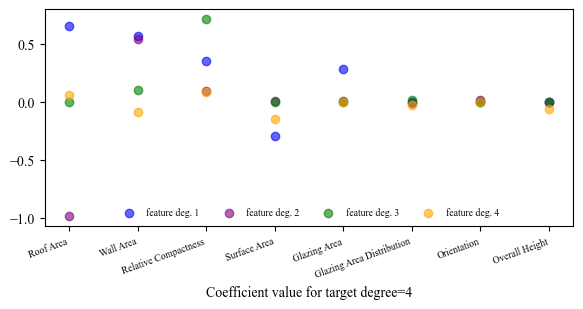

In [35]:
from src.weights import plot_coeffs

colors = ["blue", "purple", "green", "orange"]
N = 4
for deg in range(1, N+1):
    plot_coeffs(coefs=CL_coeffs[target_deg], target_deg=deg, colors=colors)